In [1]:
from keras_vggface.vggface import VGGFace

/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
vggface = VGGFace(model='vgg16')
1

1

In [3]:
from  keras.layers import Input
from keras.engine import Model
conv_base=VGGFace(include_top=False,input_shape=(150,150,3),pooling='None')

In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 150, 150, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 150, 150, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 75, 75, 64)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 75, 75, 128)       147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 37, 37, 128)       0         
__________

In [5]:
from keras import models
from keras import layers

model= models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))
model.summary()

## Freezing the conv_base
conv_base.trainable=False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vggface_vgg16 (Model)        (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 16,813,638
Non-trainable params: 0
_________________________________________________________________


In [6]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
PATH = './'
cartoon_dir = os.path.join(PATH,'Train_Cartoon/')
Test_Cartoon=os.path.join(PATH,'Test_Cartoon/')

train_datagen=ImageDataGenerator(rescale =1./255,
                                rotation_range = 40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip = True,
                                fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(cartoon_dir ,
                                                   target_size =(150,150),
                                                   batch_size=35,
                                                   class_mode='categorical')
    
validation_generator = test_datagen.flow_from_directory(Test_Cartoon,
                                                       target_size=(150,150),
                                                       batch_size=35,
                                                       class_mode='categorical')    

from keras import optimizers 
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

Found 4933 images belonging to 6 classes.
Found 2053 images belonging to 6 classes.


In [7]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=50,shuffle =True,
                             validation_data=validation_generator,
                             validation_steps=20)

Epoch 1/50
 99/100 [============================>.] - ETA: 0s - loss: 1.4391 - acc: 0.4407

/usr/lib64/python3.4/dist-packages/PIL/Image.py:916: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


100/100 [==============================] - 48s 483ms/step - loss: 1.4383 - acc: 0.4411 - val_loss: 0.7095 - val_acc: 0.7600
Epoch 2/50
100/100 [==============================] - 44s 441ms/step - loss: 1.1893 - acc: 0.5537 - val_loss: 0.6309 - val_acc: 0.8000
Epoch 3/50
100/100 [==============================] - 44s 436ms/step - loss: 1.0803 - acc: 0.6092 - val_loss: 0.4629 - val_acc: 0.8372
Epoch 4/50
100/100 [==============================] - 42s 421ms/step - loss: 1.0106 - acc: 0.6349 - val_loss: 0.5215 - val_acc: 0.8286
Epoch 5/50
100/100 [==============================] - 42s 419ms/step - loss: 0.9742 - acc: 0.6480 - val_loss: 0.6253 - val_acc: 0.8086
Epoch 6/50
100/100 [==============================] - 43s 430ms/step - loss: 0.9393 - acc: 0.6631 - val_loss: 0.5775 - val_acc: 0.8096
Epoch 7/50
100/100 [==============================] - 42s 420ms/step - loss: 0.9113 - acc: 0.6753 - val_loss: 0.6070 - val_acc: 0.7957
Epoch 8/50
100/100 [==============================] - 48s 475ms/st

In [8]:
model.save('cartoon_3.h5')

In [9]:
def plot_acc_loss(acc,val_Acc, loss,val_loss):
    import matplotlib.pyplot as plt
    epochs = range(1,len(acc)+1)
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(epochs,acc,'bo',label='Training_acc')
    plt.plot(epochs,val_acc,'b',label='Validation_acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(222)
    plt.plot(epochs,loss,'ro',label='Training_loss')
    plt.plot(epochs,val_loss,'r',label='Validation_loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

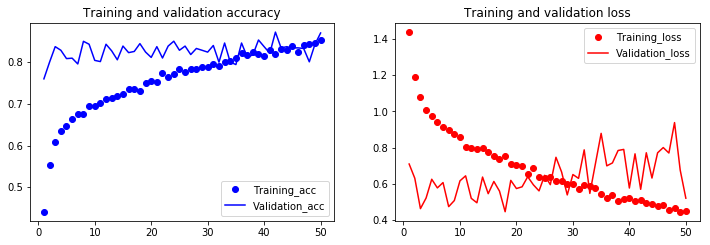

In [11]:
acc= history.history['acc']
val_acc=history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']

plot_acc_loss(acc,val_acc, loss,val_loss)

In [12]:
import pandas as pd
type(val_loss)
ma= {'Acc':acc,'Val_Acc':val_acc,'Loss':loss,'Val_loss':val_loss}
model_Acc= pd.DataFrame(ma)
model_Acc.to_csv("Cartoon_model_3.csv")

In [13]:
def test_img(img):
    import numpy as np
    import cv2
    import matplotlib.pyplot as plt
    from keras.preprocessing import image
    ob=cv2.imread(img)
    ob.shape
    obimg = cv2.resize(ob,(150,150),interpolation=cv2.INTER_AREA)
#print(obimg.shape)
#converting from BGR to RBG
    obimg = cv2.cvtColor(obimg,cv2.COLOR_BGR2RGB)
    print('Converting Image to Array')
    img_tensor = image.img_to_array(obimg)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    print(img_tensor.shape)
    plt.imshow(img_tensor[0])
    plt.show()
    return(img_tensor)

In [14]:
Pred_Cartoon=os.path.join(PATH,'Prediction_Test/')
#pred_path = os.path.join(PATH,'Prediction_Test/')
Pred_Cartoon

'./Prediction_Test/'

Converting Image to Array
(1, 150, 150, 3)


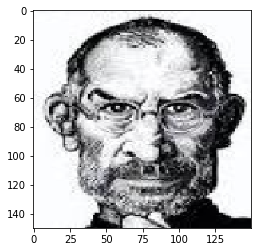

In [15]:
img=os.path.join(Pred_Cartoon,'SteveJobs0010.jpeg')
img_tensor=test_img(img) 

In [16]:
model.predict(img_tensor)

array([[4.0215752e-12, 3.3292332e-18, 2.0045278e-10, 1.6440264e-19,
        6.4830907e-16, 1.0000000e+00]], dtype=float32)

Converting Image to Array
(1, 150, 150, 3)


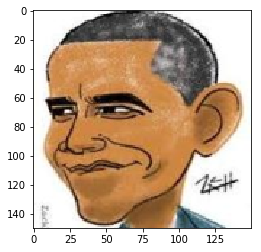

array([[8.7729440e-08, 3.0129236e-11, 9.9999988e-01, 3.1123108e-13,
        7.1828372e-12, 2.3071157e-08]], dtype=float32)

In [17]:
img=os.path.join(Pred_Cartoon,'BarackObama0169.jpeg')
img_tensor=test_img(img)
model.predict(img_tensor)

Converting Image to Array
(1, 150, 150, 3)


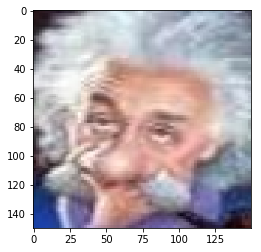

array([[1.7736486e-10, 1.0000000e+00, 2.8372313e-09, 4.8189480e-11,
        1.7443238e-13, 1.5088222e-11]], dtype=float32)

In [18]:
img=os.path.join(Pred_Cartoon,'AlbertEinstein0145.jpeg')
img_tensor=test_img(img)
model.predict(img_tensor)

'Abraham_Lincon': 0,
 'Albert_Einstein': 1,
 'Barack_Obama': 2,
 'Donald_Trump': 3,
 'Mahatma_Gandhi': 4,
 'Steve_Jobs': 5

Converting Image to Array
(1, 150, 150, 3)


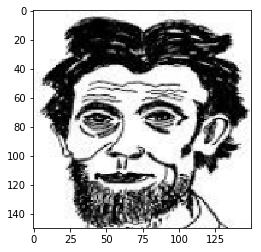

array([[2.9839245e-03, 9.9701393e-01, 2.0861951e-06, 5.7835803e-10,
        2.7774119e-10, 7.3296966e-11]], dtype=float32)

In [19]:
img=os.path.join(Pred_Cartoon,'AbrahamLincoln0176.jpg')
img_tensor=test_img(img)
model.predict(img_tensor)

Converting Image to Array
(1, 150, 150, 3)


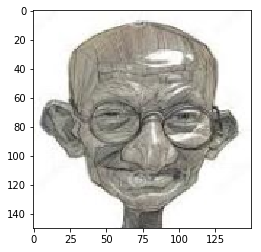

array([[1.0825001e-06, 2.4727735e-06, 3.7329933e-06, 1.4621581e-06,
        9.7079426e-01, 2.9196896e-02]], dtype=float32)

In [20]:
img=os.path.join(Pred_Cartoon,'MahatmaGandhi0080.jpeg')
img_tensor=test_img(img)
model.predict(img_tensor)